In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Dataset EDA

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


### Understanding columns, checking column types and making new columns

In [3]:
df.shape

(8693, 14)

In [4]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Checking data types to see if everything is loaded properly. For now only Age should be converted to int.

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


We can see there is a lot of passengers that spend nothing on a voyage.<br>
Age should be checked because of minimum age 0?

In [6]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
dtype: int64

Not a lot of NaN values which will be resolved later.

In [7]:
df[["PassengerGroup","PassengerGroupNumber"]] = df["PassengerId"].str.split("_",expand=True).astype("int64")

In [8]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerGroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,5,1
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,6,1
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,6,2
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,7,1
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,8,1


Splitting PassengerId column in two separate columns which indicate passenger group as well as a person number in that group.<br>
These columns might come in usefull later when we come to deal with NaN values.

In [9]:
df["HomePlanet"].nunique()

3

In [10]:
df["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [11]:
df.groupby(["HomePlanet","Destination"])["Destination"].count()

HomePlanet  Destination  
Earth       55 Cancri e       690
            PSO J318.5-22     712
            TRAPPIST-1e      3101
Europa      55 Cancri e       886
            PSO J318.5-22      19
            TRAPPIST-1e      1189
Mars        55 Cancri e       193
            PSO J318.5-22      49
            TRAPPIST-1e      1475
Name: Destination, dtype: int64

In [12]:
df.dropna(subset="HomePlanet",inplace=True)

There isn't any reasonable way to impute missing home planet.

In [13]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

CryoSleep       215
ShoppingMall    201
VIP             200
Cabin           193
Name            193
VRDeck          187
FoodCourt       181
Spa             180
Destination     178
Age             177
RoomService     175
dtype: int64

In [14]:
df.loc[(df["CryoSleep"]==pd.NA)&(df["Cabin"]==pd.NA),:]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerGroupNumber


In [15]:
df[["CryoSleep","Cabin"]] = df[["PassengerGroup","CryoSleep","Cabin"]].groupby(["PassengerGroup"]).ffill().bfill()

In [16]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

ShoppingMall    201
VIP             200
Name            193
VRDeck          187
FoodCourt       181
Spa             180
Destination     178
Age             177
RoomService     175
dtype: int64

For column CryoSleep we imputed the missing data usign Cabin and vice versa.<br>
The logic behind this step is that if passenger that is using cryosleep is confined in a cabin, that means that the other passengers in the same cabin should also be confined and vice versa.<br>
The imputation is done only on groups where there is more than one passenger and that explains the left out NaN values for these columns.

In [17]:
df[["CabinDeck", "CabinNumber", "CabinSide"]] = df["Cabin"].str.split("/",expand=True)

Splitting the Cabin column because it contains more information which can be used in classification.

In [18]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerGroupNumber,CabinDeck,CabinNumber,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,5,1,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,6,1,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,6,2,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,7,1,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,8,1,B,1,P


In [19]:
df.dropna(subset=["Destination"],inplace=True)

In [20]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

VIP             197
ShoppingMall    196
Name            189
VRDeck          185
Spa             177
FoodCourt       175
Age             174
RoomService     172
dtype: int64

Same as home planet column there is no resonable way to impute destination.

<Axes: xlabel='Age', ylabel='Count'>

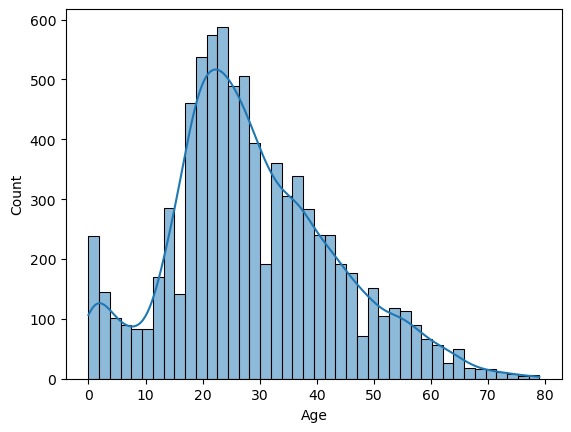

In [21]:
sns.histplot(df["Age"],kde=True)

In [22]:
from scipy.stats import normaltest

In [23]:
normaltest(df["Age"],nan_policy="omit")

NormaltestResult(statistic=223.54788671816146, pvalue=2.8654522686690044e-49)

From histogram we can see that age is not normally distributed.We also provided a normality test just to be precise.<br>
One thing that stands out is the number of people with age 0.

In [24]:
df["VIP"].value_counts(normalize=True)

False    0.976346
True     0.023654
Name: VIP, dtype: float64

We can easily impute VIP with False.

<Axes: >

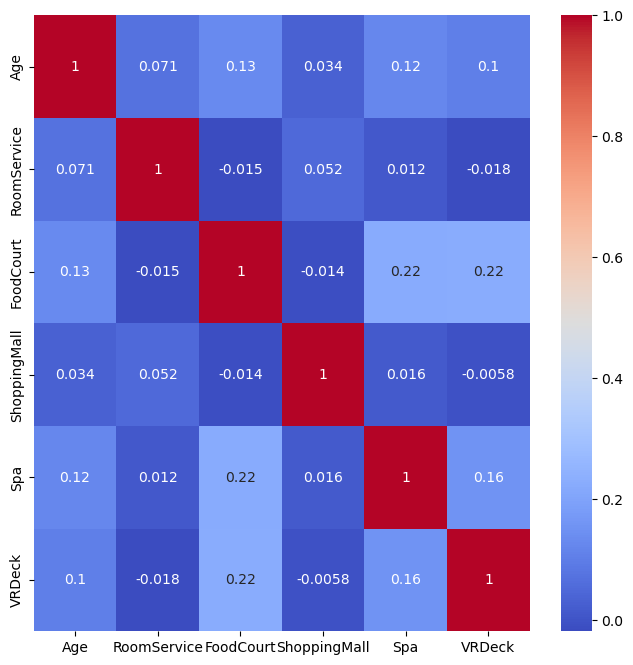

In [25]:
plt.rc("figure",figsize=(8,8))
sns.heatmap(df.select_dtypes("float64").corr(),annot=True,cmap="coolwarm")

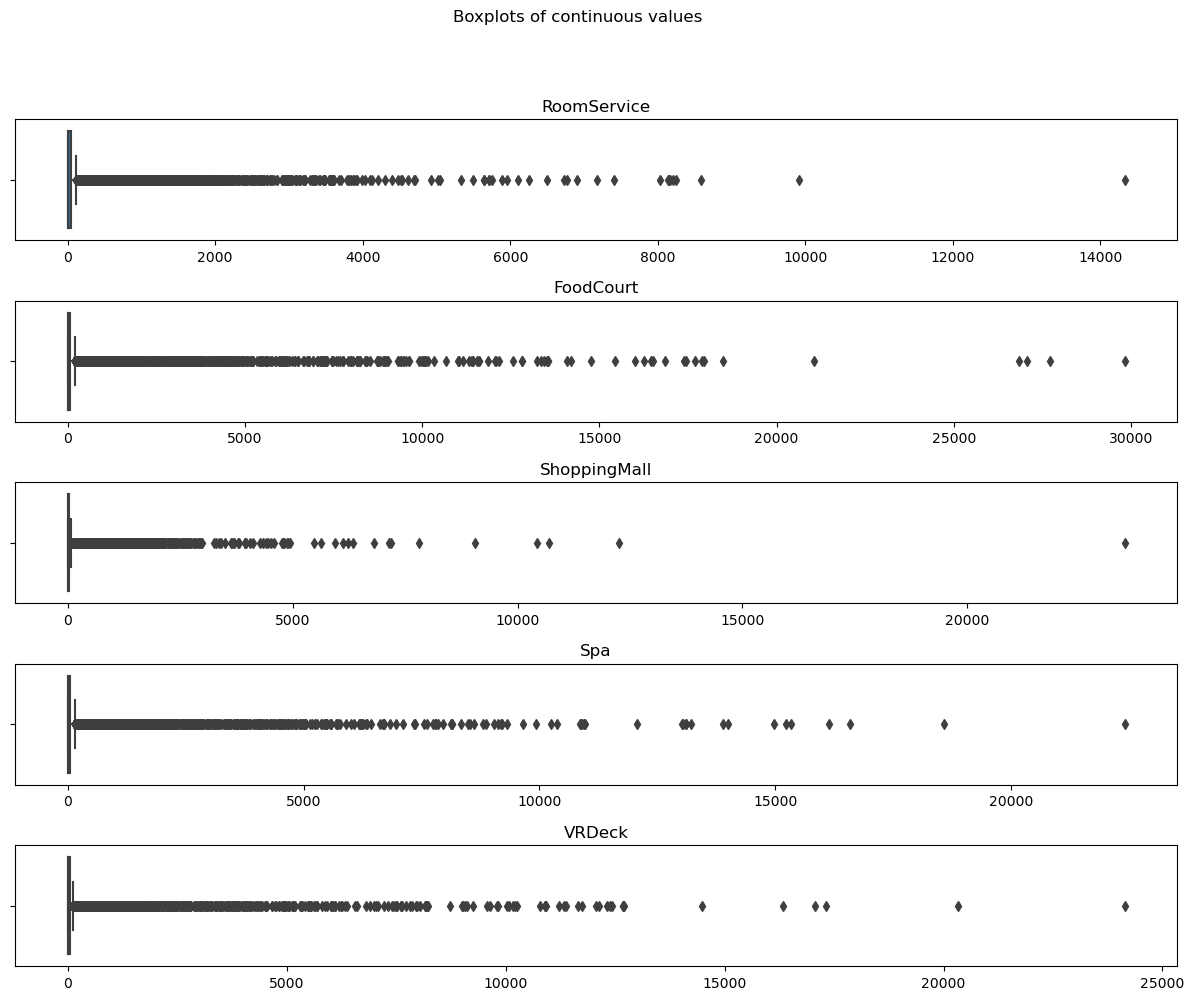

In [26]:
df_float = df.select_dtypes("float64").iloc[:,1:]
columns = df_float.columns

plt.rc("figure",figsize=(15,11))

fig, ax = plt.subplots(5,1)

fig.suptitle("Boxplots of continuous values")
fig.subplots_adjust(hspace=0.5)

for ax,value,name in zip(ax.flatten(),df_float.values.T,columns):
    sns.boxplot(x=value,ax=ax)
    ax.set(title=str(name))
plt.show()

In [27]:
df_float.loc[:,"RoomService"].value_counts()

0.0       5336
1.0        111
2.0         76
3.0         56
4.0         44
          ... 
1100.0       1
1025.0       1
111.0        1
638.0        1
745.0        1
Name: RoomService, Length: 1240, dtype: int64

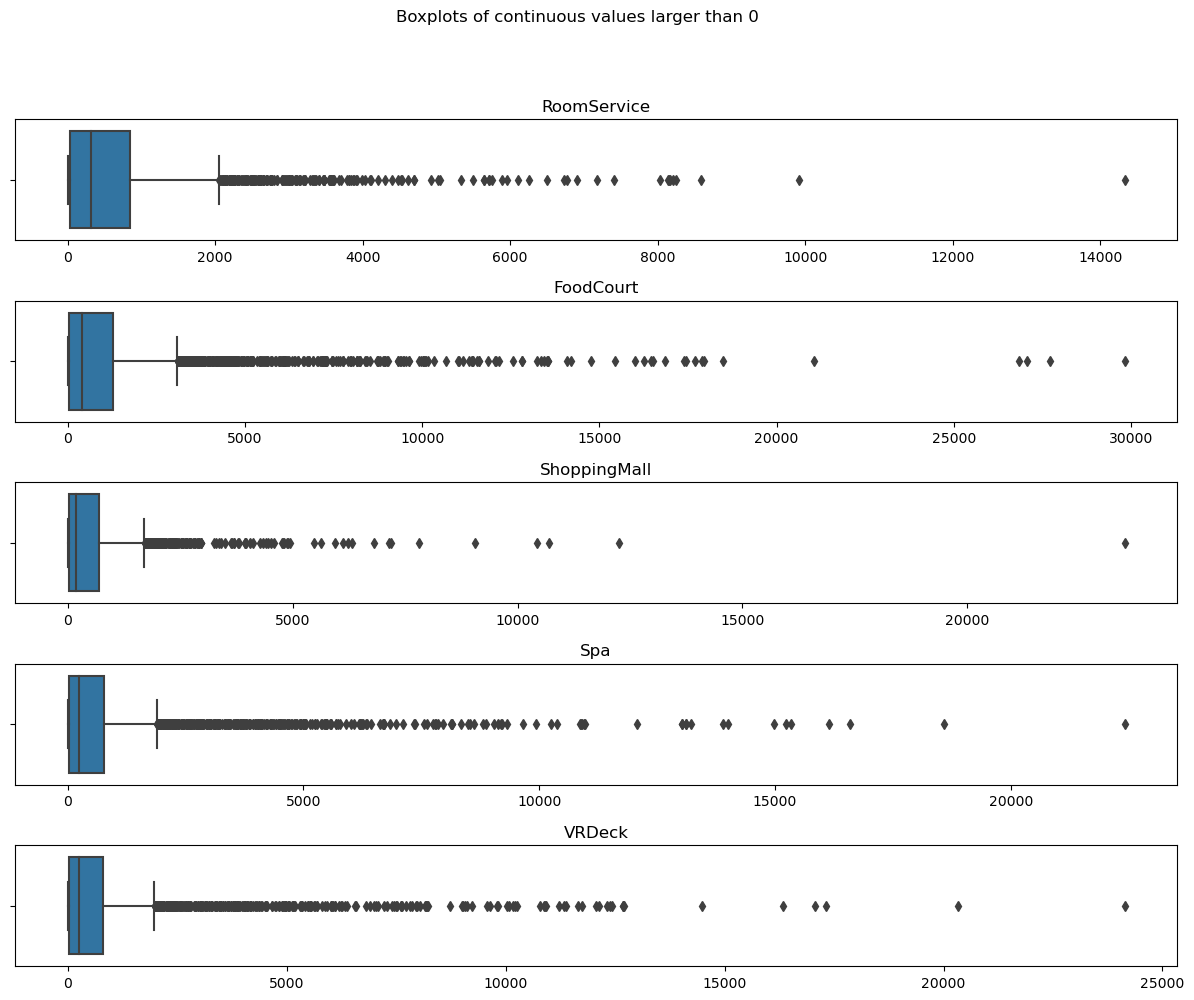

In [28]:
df_float_1 = df_float.copy()
for name in columns:
    df_float_1[name] = df_float_1.loc[df_float_1[name]>0,name]

plt.rc("figure",figsize=(15,11))

fig, ax = plt.subplots(5,1)

fig.suptitle("Boxplots of continuous values larger than 0")
fig.subplots_adjust(hspace=0.5)

for ax,value,name in zip(ax.flatten(),df_float_1.values.T,columns):
    sns.boxplot(x=value,ax=ax)
    ax.set(title=str(name))
plt.show()

In [29]:
df_float.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8142.000000,8139.000000,8118.000000,8137.000000,8129.000000
mean,225.537829,465.207274,174.957502,311.711196,307.234715
std,673.644748,1637.268381,609.228194,1132.136829,1158.307217
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,78.000000,27.000000,59.000000,45.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [30]:
df_float_1.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2806.000000,2916.000000,2773.000000,3041.000000,2876.000000
mean,654.429437,1298.464335,512.190768,834.065768,868.397427
std,1017.980470,2530.102260,956.055254,1730.463240,1818.133712
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,37.000000,41.000000,22.000000,27.000000,28.000000
50%,313.500000,397.000000,196.000000,232.000000,260.000000
75%,843.750000,1265.000000,699.000000,773.000000,810.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [31]:
#df["RoomService"] = pd.cut(df["RoomService"],bins=[0,1,314,2000,4000,round(max(df["RoomService"]))], include_lowest=True, labels=["no_spending", "low_spending", "medium_spending", "high_spending","very_high_spending"])

In [32]:
#df["FoodCourt"] = pd.cut(df["FoodCourt"],bins=[0,1,398,2500,5000,round(max(df["FoodCourt"]))], include_lowest=True, labels=["no_spending", "low_spending", "medium_spending", "high_spending","very_high_spending"])

In [33]:
#df["Spa"] = pd.cut(df["Spa"],bins=[0,1,232,2000,5000,round(max(df["Spa"]))], include_lowest=True, labels=["no_spending", "low_spending", "medium_spending", "high_spending","very_high_spending"])

In [34]:
#df["ShoppingMall"] = pd.cut(df["ShoppingMall"],bins=[0,1,196,1000,5000,round(max(df["ShoppingMall"]))], include_lowest=True, labels=["no_spending", "low_spending", "medium_spending", "high_spending","very_high_spending"])

In [35]:
#df["VRDeck"] = pd.cut(df["VRDeck"],bins=[0,1,260,2000,5000,round(max(df["VRDeck"]))], include_lowest=True, labels=["no_spending", "low_spending", "medium_spending", "high_spending","very_high_spending"])

In [36]:
#df.dropna(inplace=True)

From above graphs and descriptive statistics we can see that median value is 0.<br>
So the missing data can be imputed using median since we can't use mean as the values are not normally distributed.

In [37]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerGroupNumber,CabinDeck,CabinNumber,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S


In [38]:
df.drop(columns=["PassengerId","Cabin","Name","PassengerGroup","PassengerGroupNumber","CabinNumber"],inplace=True)

In [39]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


Dropped columns that are not going to be used for prediciton.<br>
Name is basically a identifier which is in almost all cases unique.<br>
PassengerGroup,PassengerGroupNumber were temporary columns <br>
From Cabin column we extracted more information.
<hr>

In [40]:
column_names = list(df.columns.values)
new_column_arr = column_names[0:10]+column_names[11:]
new_column_arr.append(column_names[10])
df = df[new_column_arr]

In [41]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S,True


This is the end of EDA<br>
There are some feature engineering to be done as well as missing data impution which will be done later
<hr>

## Preparing data for model prediciton

In [42]:
df["Transported"].value_counts(normalize=True)

True     0.503368
False    0.496632
Name: Transported, dtype: float64

We can see that output variable has well balanced output classes so we won't need to over/under sample data.

In [43]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold
from sklearn.feature_selection import SelectKBest,SelectFpr,SelectFwe,chi2

### Pipelines

In [44]:
df.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
CabinDeck        object
CabinSide        object
Transported        bool
dtype: object

In [45]:
#df[df.select_dtypes("category").columns] = df.select_dtypes("category").astype("object")

In [46]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape)
print(y.shape)

(8314, 12)
(8314,)


In [47]:
categorical_columns = X.select_dtypes(["bool","object"]).columns.values
categorical_columns

array(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinSide'], dtype=object)

In [48]:
numeric_columns = X.select_dtypes(["float64","int64"]).columns.values
numeric_columns

array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)

In [49]:
categorical_prep_pipeline = Pipeline(steps=[
    ("imputecat",SimpleImputer(missing_values=np.nan,strategy="most_frequent")),
    ("onehot",OneHotEncoder()),
    #("kbest",SelectKBest(chi2,k=15))
])

In [50]:
numerical_prep_pipeline = Pipeline(steps=[
    ("imputenum",SimpleImputer(missing_values=np.nan,strategy="median")),
    ("power",PowerTransformer(method="yeo-johnson")),
    #("poly",PolynomialFeatures(degree=2))
])

In [51]:
preprocessor = ColumnTransformer(transformers=[
    ("numeric",numerical_prep_pipeline,numeric_columns),
    ("category",categorical_prep_pipeline,categorical_columns)
],remainder="passthrough",sparse_threshold=0)

### Making models

#### Lower & Higher complexity models with basic settings

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [57]:
model_names = ["LightGBM", "CatBoost","Random Forest","XGBoost"]
base_models = [LGBMClassifier(random_state=1389), CatBoostClassifier(random_state=1389,verbose=False), RandomForestClassifier(random_state=1389),XGBClassifier(random_state=1389)]
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1389)

df_base_models = pd.DataFrame(columns=["Model","Test_acc","Test_std"])

for model,name in zip(base_models,model_names):

    pipeline_base_models  = Pipeline(steps=[
    ("preprocess",preprocessor),
    (name,model)
    ])
    scores = list()
    for fold_ix,(train_ix,test_ix) in enumerate(skf.split(X,y)):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        pipeline_base_models.fit(X_train,y_train)

        y_hat = pipeline_base_models.predict(X_test)

        acc = accuracy_score(y_test,y_hat)
        scores.append(acc)

        #print(f'Fold {fold_ix+1} - Accuracy: {acc:.5f}')
    #print(f"\n Average Accuracy: {np.mean(scores):.5f} ± {np.std(scores):.5f}")

    df_base_models.loc[len(df_base_models)] = [name, round(np.mean(scores),5), round(np.std(scores),5)]
    
df_base_models.sort_values("Test_acc",ascending=False)


,Model,Test_acc,Test_std
1,CatBoost,0.80683,0.00981
0,LightGBM,0.80226,0.01022
3,XGBoost,0.79961,0.01085
2,Random Forest,0.79624,0.01013


As we can see we got pretty good results with basic settings, or to be more precise without hyperparameter tuning. We also didn't do any feature engineering<br>
We are going to tune two best base models for now.

#### Hyperparameter tuning

In [58]:
params_cat = {
    "cat__iterations":np.linspace(start=100, stop=500, num=5).astype("int64"),
    "cat__learning_rate":np.linspace(start=0, stop=0.2, num=6),
    "cat__depth":[4,5,6,7,8,9],
}

In [59]:
pipeline_cat  = Pipeline(steps=[
    ("preprocess",preprocessor),
    ("cat",CatBoostClassifier(random_state=1389,verbose=False))
])

In [60]:
search_cat = RandomizedSearchCV(pipeline_cat,param_distributions=params_cat,n_iter=30,scoring="accuracy")

In [61]:
search_cat.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('imputenum',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('power',
                                                                                                PowerTransformer())]),
                                                                               array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)),
                                                                              ('category',
                                                                               Pipeline(steps...
                                                                               array(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinSide'], dtype=object))])),
                                             ('cat',
                                              <catboost.core.CatBoostClassifier object at 0x0000017F4D9F5B40>)]),
                   n_iter=30,
                   param_distributions={'cat__depth': [4, 5, 6, 7, 8, 9],
                                        'cat__iterations': array([100, 200, 300, 400, 500], dtype=int64),
                                        'cat__learning_rate': array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 ])},
                   scoring='accuracy')

In [62]:
print('Best param: ', search_cat.best_params_)

Best param:  {'cat__learning_rate': 0.16, 'cat__iterations': 100, 'cat__depth': 5}


In [63]:
search_cat.cv_results_['mean_test_score']

array([0.79393546,        nan, 0.8035564 , 0.79647405, 0.79513635,
       0.7976769 , 0.79821122, 0.79794437, 0.78564794, 0.79326612,
       0.79994811,        nan,        nan, 0.79166131, 0.79927975,
       0.79339945, 0.79781051, 0.79553912, 0.79633965, 0.78658359,
       0.79714152, 0.79781006,        nan, 0.79700872, 0.79781024,
       0.78471247, 0.79847913,        nan, 0.79767673, 0.79674143])

In [64]:
scores = list()
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1389)

In [65]:
pipeline_cat_tuned  = Pipeline(steps=[
    ("preprocess",preprocessor),
    ("cat",CatBoostClassifier(iterations=100, depth=5, learning_rate=0.16,verbose=False,random_state=1389))
])

In [66]:
for fold_ix,(train_ix,test_ix) in enumerate(skf.split(X,y)):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    pipeline_cat_tuned.fit(X_train,y_train)

    y_hat = pipeline_cat_tuned.predict(X_test)

    acc = accuracy_score(y_test,y_hat)
    scores.append(acc)

    print(f'Fold {fold_ix+1} - Accuracy: {acc:.5f}')
print(f"\n Average Accuracy: {np.mean(scores):.5f} ± {np.std(scores):.5f}")


Fold 1 - Accuracy: 0.82332
Fold 2 - Accuracy: 0.80889
Fold 3 - Accuracy: 0.80649
Fold 4 - Accuracy: 0.79928
Fold 5 - Accuracy: 0.79182
Fold 6 - Accuracy: 0.79663
Fold 7 - Accuracy: 0.79663
Fold 8 - Accuracy: 0.80505
Fold 9 - Accuracy: 0.81709
Fold 10 - Accuracy: 0.81348

 Average Accuracy: 0.80587 ± 0.00954


In [67]:
params_xg = {
    "xg__eta":np.linspace(start=0, stop=0.1, num=7),
    "xg__gamma":[0,1,2,3,4,5],
    "xg__max_depth":np.linspace(start=1, stop=15, num=5).astype("int64"),
    "xg__min_child_weight":[1,2,3,4,5]
}

In [68]:
pipeline_xg  = Pipeline(steps=[
    ("preprocess",preprocessor),
    ("xg",XGBClassifier(random_state=1389))
])

In [69]:
search_xg = RandomizedSearchCV(pipeline_xg,param_distributions=params_xg,n_iter=30,scoring="accuracy")

In [70]:
search_xg.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('imputenum',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('power',
                                                                                                PowerTransformer())]),
                                                                               array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)),
                                                                              ('category',
                                                                               Pipeline(steps...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=1389, ...))]),
                   n_iter=30,
                   param_distributions={'xg__eta': array([0.        , 0.01666667, 0.03333333, 0.05      , 0.06666667,
       0.08333333, 0.1       ]),
                                        'xg__gamma': [0, 1, 2, 3, 4, 5],
                                        'xg__max_depth': array([ 1,  4,  8, 11, 15], dtype=int64),
                                        'xg__min_child_weight': [1, 2, 3, 4,
                                                                 5]},
                   scoring='accuracy')

In [71]:
print('Best param: ', search_xg.best_params_)

Best param:  {'xg__min_child_weight': 1, 'xg__max_depth': 15, 'xg__gamma': 3, 'xg__eta': 0.08333333333333333}


In [72]:
search_xg.cv_results_['mean_test_score']

array([0.73700663, 0.50327411, 0.79179696, 0.76573736, 0.75304236,
       0.77241854, 0.7939352 , 0.79380204, 0.79286523, 0.79380186,
       0.78925846, 0.7931335 , 0.79767762, 0.75304236, 0.79032754,
       0.79299937, 0.77241854, 0.79313377, 0.76172836, 0.79807788,
       0.79072807, 0.76573736, 0.79300008, 0.73700663, 0.79326737,
       0.75304236, 0.7947376 , 0.79019429, 0.78885713, 0.50327411])

In [73]:
scores = list()
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1389)

In [74]:
pipeline_xg_tuned  = Pipeline(steps=[
    ("preprocess",preprocessor),
    ("xg",XGBClassifier(eta=0.083, gamma=3, min_child_weight=1, max_depth=15))
])

In [75]:
for fold_ix,(train_ix,test_ix) in enumerate(skf.split(X,y)):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    pipeline_xg_tuned.fit(X_train,y_train)

    y_hat = pipeline_xg_tuned.predict(X_test)

    acc = accuracy_score(y_test,y_hat)
    scores.append(acc)

    print(f'Fold {fold_ix+1} - Accuracy: {acc:.5f}')
print(f"\n Average Accuracy: {np.mean(scores):.5f} ± {np.std(scores):.5f}")


Fold 1 - Accuracy: 0.82452
Fold 2 - Accuracy: 0.79928
Fold 3 - Accuracy: 0.81010
Fold 4 - Accuracy: 0.80048
Fold 5 - Accuracy: 0.79302
Fold 6 - Accuracy: 0.79783
Fold 7 - Accuracy: 0.79302
Fold 8 - Accuracy: 0.79904
Fold 9 - Accuracy: 0.79783
Fold 10 - Accuracy: 0.81227

 Average Accuracy: 0.80274 ± 0.00942


### Stacking ensamble

In [76]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

In [77]:
data_x, meta_y, xgb_hat, cat_hat = pd.DataFrame(),pd.Series(), list(), list()
skf = StratifiedKFold(n_splits=10,shuffle=True)

In [78]:
for train_ix, test_ix in skf.split(train_X,train_y):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    data_x = pd.concat([data_x,X_test],axis=0)
    meta_y = meta_y.append(y_test)

    pipeline_cat_tuned.fit(X_train,y_train)
    yhat1 = pipeline_cat_tuned.predict_proba(X_test)[:, 0]
    cat_hat.extend(yhat1)

    pipeline_xg_tuned.fit(X_train,y_train)
    yhat2 = pipeline_xg_tuned.predict_proba(X_test)[:,0]
    xgb_hat.extend(yhat2)


In [79]:
meta_X = data_x.copy()
meta_X["cat_hat"],meta_X["xgb_hat"] = cat_hat, xgb_hat

In [80]:
pipeline_xg_tuned = Pipeline(steps=[
    ("preprocess",preprocessor),
    ("xg",XGBClassifier())
])
pipeline_cat_tuned  = Pipeline(steps=[
    ("preprocess",preprocessor),
    ("cat",CatBoostClassifier(verbose=False))
])

In [81]:
pipeline_xg_tuned.fit(train_X,train_y)
pipeline_cat_tuned.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputenum',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)),
                                                 ('category',
                                                  Pipeline(steps=[('imputecat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  array(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinSide'], dtype=object))])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x0000017F46BA49A0>)])

In [82]:
y_hat_cat = pipeline_cat_tuned.predict_proba(test_X)[:,0]
y_hat_xg = pipeline_xg_tuned.predict_proba(test_X)[:,0]

In [83]:
print(f"Xgb model accuracy: {accuracy_score(test_y,pipeline_xg_tuned.predict(test_X))}",f"CatBoost model accuracy: {accuracy_score(test_y,pipeline_cat_tuned.predict(test_X))}")

Xgb model accuracy: 0.7955502104630187 CatBoost model accuracy: 0.8045700541190619


In [98]:
pipeline_lr = Pipeline(steps=[
    ("preprocess",preprocessor),
    ("lr",LogisticRegression(solver="liblinear"))
])

In [99]:
pipeline_lr.fit(meta_X,meta_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputenum',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)),
                                                 ('category',
                                                  Pipeline(steps=[('imputecat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  array(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinSide'], dtype=object))])),
                ('lr', LogisticRegression(solver='liblinear'))])

In [100]:
meta_X = test_X.copy()
meta_X["cat_hat"],meta_X["xgb_hat"] = y_hat_cat, y_hat_xg

In [101]:
y_hat = pipeline_lr.predict(meta_X)

In [102]:
print(f"Meta model accuracy: {accuracy_score(test_y,y_hat):.5f}")

Meta model accuracy: 0.79735
